In [3]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [4]:
from main import *

In [5]:
%%time
fn1 = "data/randomSampleSta10.csv"
fn2 = "data/randomSampleScan10.csv"
n = 125
x1, y1, z1 = smoothSpherical(fn1, n)
x2, y2, z2 = smoothSpherical(fn2, n)

importing CSV data ...
Converting to spherical coords ...
min/max lats (radians) -1.427986415093525 -0.015847818784296374
lngs range (radians) -1.57079632679 1.57079632679
min/max lngs (radians) 2.0861676844429624 4.1972234265367
lats range (radians) 0 6.28318530718
smoothing data ...
[########################################] | 100% Completed |  1min 44.4s
[########################################] | 100% Completed |  0.1s


Exception RuntimeError: RuntimeError('cannot join current thread',) in <Finalize object, dead> ignored


converting back to cartesian ...
min/max az (radians) -1.427986415093525 -0.015847818784296374
el range (radians) -1.57079632679 1.57079632679
min/max el (radians) 2.0861676844429624 4.1972234265367
az range (radians) 0 6.28318530718
importing CSV data ...
Converting to spherical coords ...
min/max lats (radians) -1.5104804743295754 -0.0158496951738822
lngs range (radians) -1.57079632679 1.57079632679
min/max lngs (radians) 2.0862053982301134 4.196599783607143
lats range (radians) 0 6.28318530718
smoothing data ...
[########################################] | 100% Completed | 34.3s
[########################################] | 100% Completed |  0.1s


Exception RuntimeError: RuntimeError('cannot join current thread',) in <Finalize object, dead> ignored


converting back to cartesian ...
min/max az (radians) -1.5104804743295754 -0.0158496951738822
el range (radians) -1.57079632679 1.57079632679
min/max el (radians) 2.0862053982301134 4.196599783607143
az range (radians) 0 6.28318530718
CPU times: user 30.5 s, sys: 2.7 s, total: 33.2 s
Wall time: 2min 43s


<IPython.core.display.Javascript object>


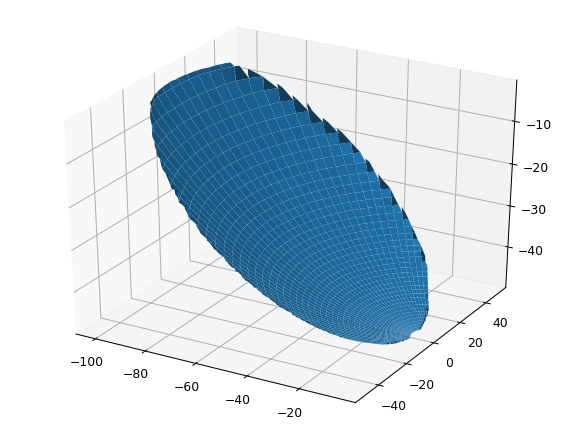

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1, y1, z1)

<IPython.core.display.Javascript object>


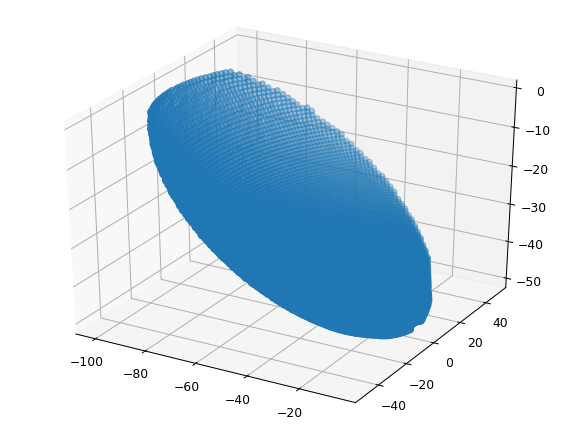

In [7]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x1, y1, z1)

<IPython.core.display.Javascript object>


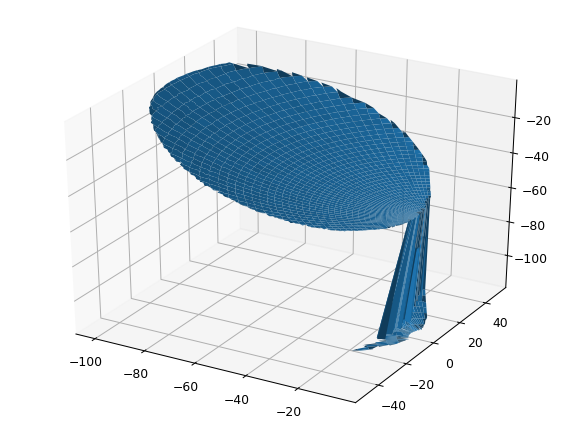

In [8]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x2, y2, z2)

<IPython.core.display.Javascript object>


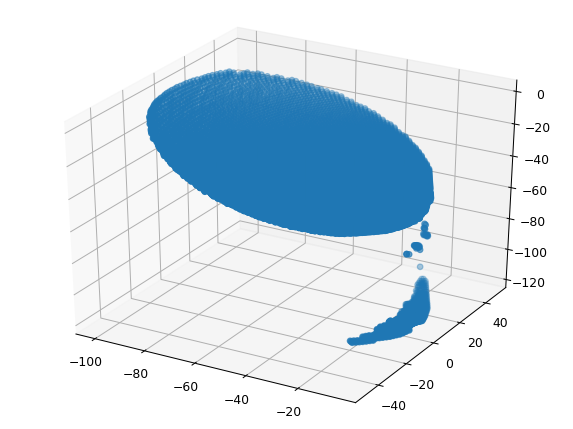

In [9]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x2, y2, z2)

In [10]:
from copy import copy
z2org = copy(z2)

In [11]:
z2[z2 < -65.] = np.nan

<IPython.core.display.Javascript object>


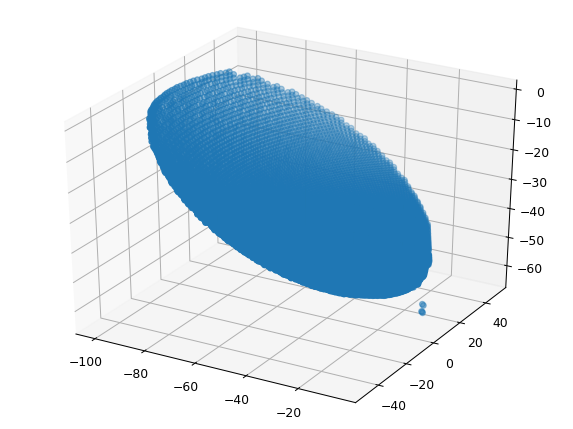

In [12]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x2, y2, z2)

In [13]:
    # interpolate both surfaces using the same xyz grid
    x1max = np.nanmax(x1)
    x1min = np.nanmin(x1)
    x2max = np.nanmax(x2)
    x2min = np.nanmin(x2)
    xrange = (min(x1min, x2min), max(x1max, x2max))
    y1max = np.nanmax(y1)
    y1min = np.nanmin(y1)
    y2max = np.nanmax(y2)
    y2min = np.nanmin(y2)
    yrange = (min(y1min, y2min), max(y1max, y2max))
    print xrange, yrange

(-100.99937991779686, -5.16646727674984) (-48.84475269704809, 48.903970574895105)


In [14]:
%%time
sx1, sy1, sz1 = interpXYZ(x1, y1, z1, n, xrange=xrange, yrange=yrange, checkLevels=True)
  

CPU times: user 2min 56s, sys: 2.68 s, total: 2min 59s
Wall time: 2min 59s


In [15]:
%%time
sx2, sy2, sz2 = interpXYZ(x2, y2, z2, n, xrange=xrange, yrange=yrange, checkLevels=True)

CPU times: user 2min 17s, sys: 121 ms, total: 2min 17s
Wall time: 2min 17s


<IPython.core.display.Javascript object>


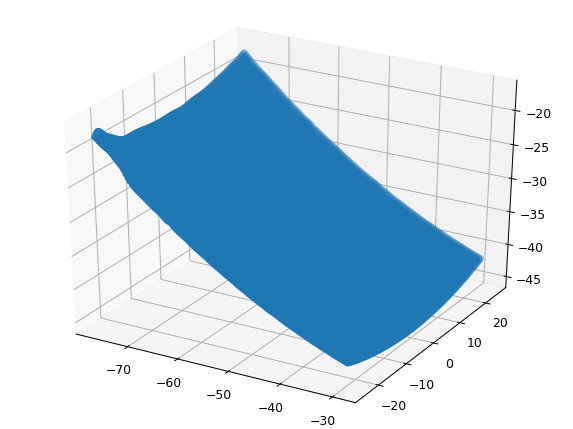

In [16]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(sx1, sy1, sz1)

<IPython.core.display.Javascript object>


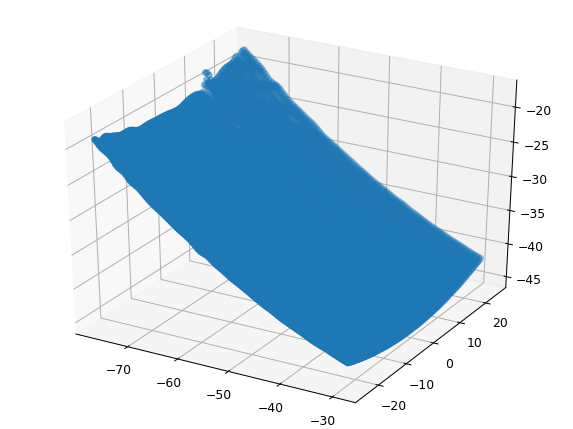

In [17]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(sx2, sy2, sz2)

In [18]:
(sx1 == sx2).all()

True

In [19]:
zdiff = sz1 - sz2


<IPython.core.display.Javascript object>


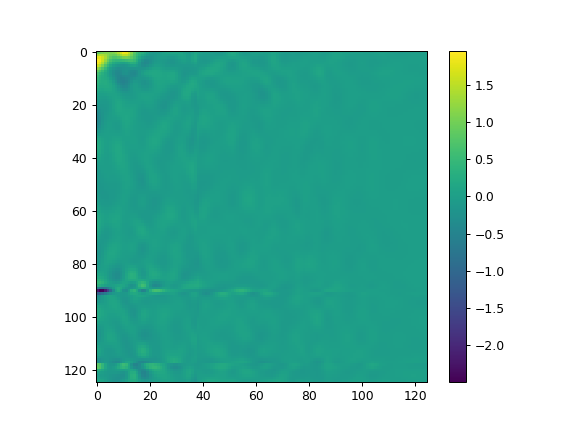

In [20]:
fig, ax = plt.subplots()
img = ax.imshow(zdiff)
cbar = ax.figure.colorbar(img, ax=ax)

<IPython.core.display.Javascript object>


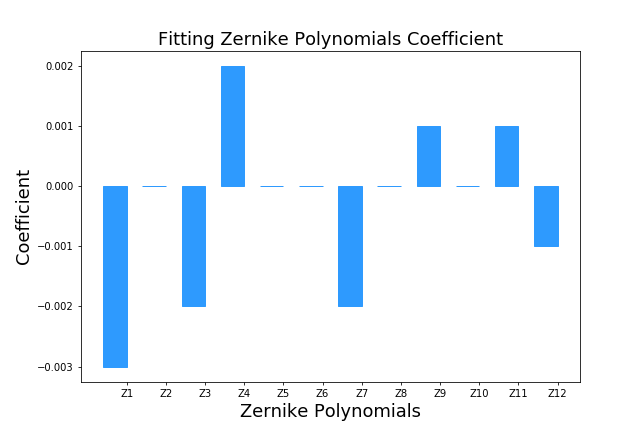

<IPython.core.display.Javascript object>


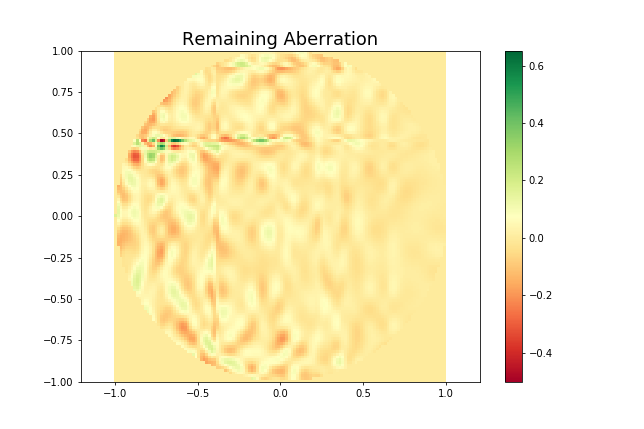

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.000 |-0.002 | 0.002 | 0.000 | 0.000 |-0.002 |-0.000 | 0.001 | 0.000 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
| 0.001 |-0.001 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

<IPython.core.display.Javascript object>


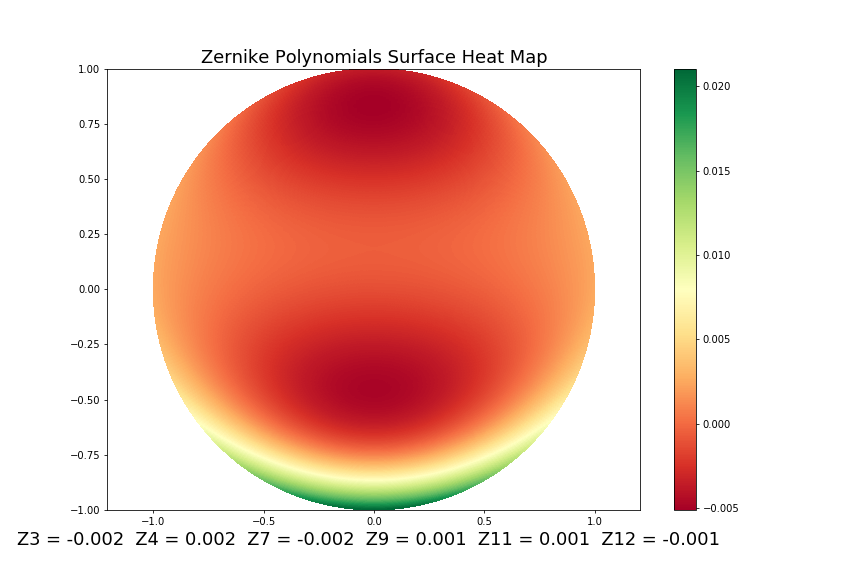

Z3 =  -0.002 Z11 y Tilt
Z4 =  0.002 Z20 Defocus
Z7 =  -0.002 Z31 Primary y Coma
Z9 =  0.001 Z33 y Trefoil
Z11 =  0.001 Z40 Primary Spherical
Z12 =  -0.001 Z42 Secondary Astigmatism at 0


In [21]:
zdiffOrg = copy(zdiff)
zdiff[np.isnan(zdiff)] = 0.
fits, c = zernikeFit(zdiff)

In [22]:
c.listcoefficient()

Z3 =  -0.002 Z11 y Tilt
Z4 =  0.002 Z20 Defocus
Z7 =  -0.002 Z31 Primary y Coma
Z9 =  0.001 Z33 y Trefoil
Z11 =  0.001 Z40 Primary Spherical
Z12 =  -0.001 Z42 Secondary Astigmatism at 0


['Z3 = -0.002\nZ4 = 0.002\nZ7 = -0.002\nZ9 = 0.001\nZ11 = 0.001\nZ12 = -0.001\n',
 'Z3 = -0.002  Z4 = 0.002  Z7 = -0.002  Z9 = 0.001  Z11 = 0.001  Z12 = -0.001  ']